Evaluate performance on a benchmark dataset.
Train a DBM for real-valued data representation.
Use any dataset & Evaluate the quality of learned representations.

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - loss: 0.1750 - val_loss: 0.1636
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1611 - val_loss: 0.1463
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1425 - val_loss: 0.1241
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1203 - val_loss: 0.1031
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1008 - val_loss: 0.0891
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0872 - val_loss: 0.0805
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0797 - val_loss: 0.0751
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0743 - val_loss: 0.0715
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0718 - val_loss: 0.0692
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0695 - val_loss: 0.0670
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0673 - val_loss: 0.0646
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0646 - val_loss: 0.0619
E

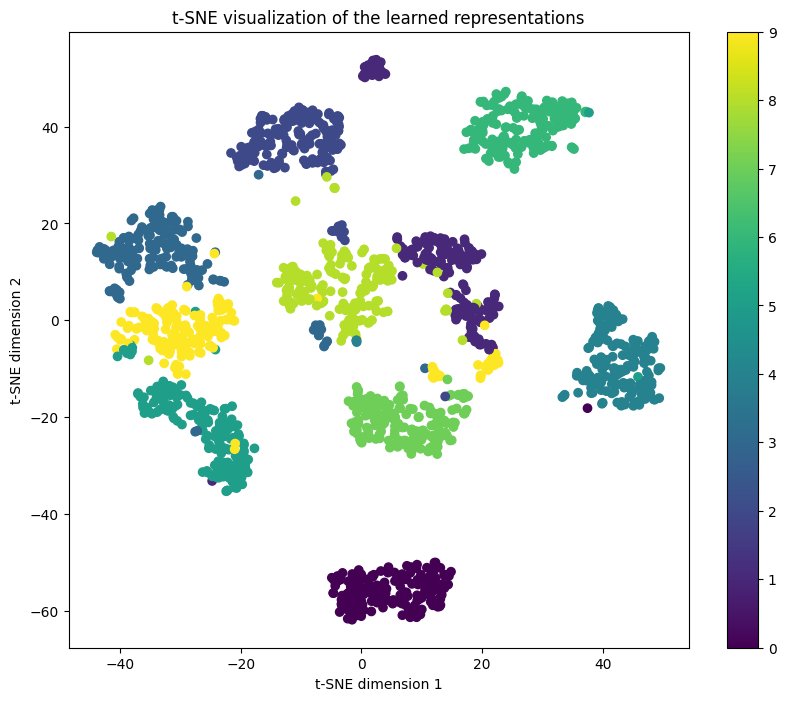

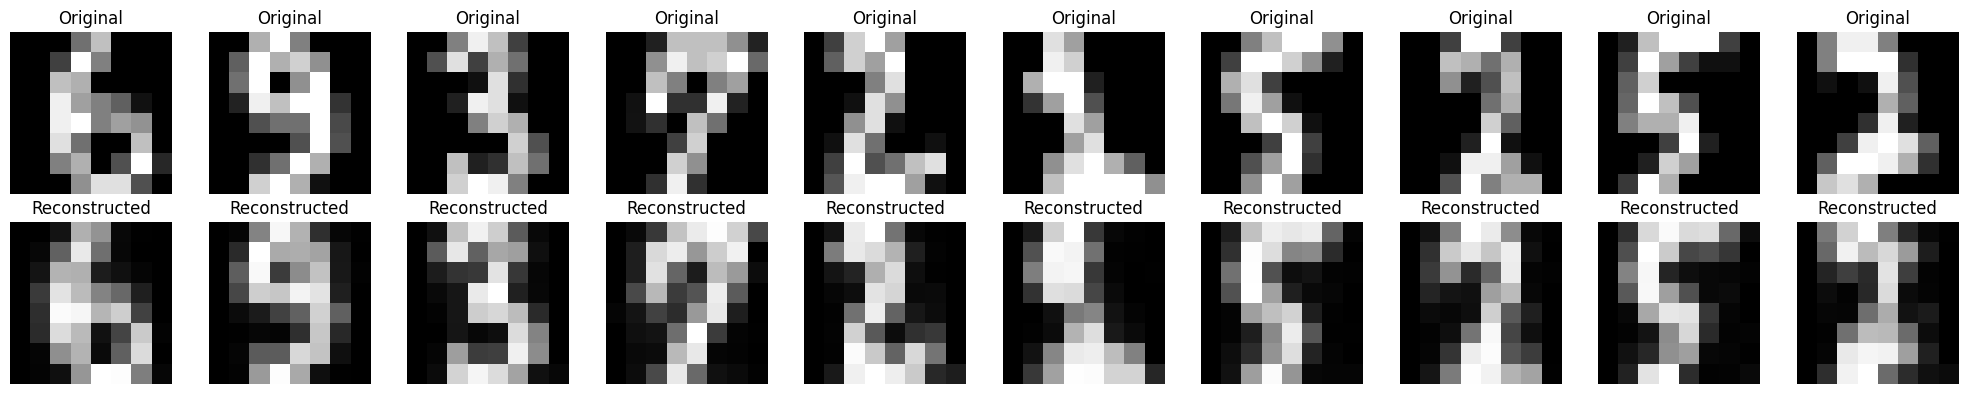

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

digits = load_digits()
X = digits.data.astype('float32')
y = digits.target


scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


input_dim = X_train.shape[1]
encoding_dim = 32


input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dense(encoding_dim, activation='relu')(encoder)

decoder = Dense(64, activation='relu')(encoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)


autoencoder = Model(inputs=input_layer, outputs=decoder)
encoder_model = Model(inputs=input_layer, outputs=encoder)


autoencoder.compile(optimizer='adam', loss='mean_squared_error')


history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test, X_test)
)


X_pred = autoencoder.predict(X_test)
mse = mean_squared_error(X_test, X_pred)
print(f"Mean squared error on test data: {mse:.4f}")


encoded_data = encoder_model.predict(X_scaled)


tsne = TSNE(n_components=2, random_state=42)
encoded_tsne = tsne.fit_transform(encoded_data)


plt.figure(figsize=(10, 8))
scatter = plt.scatter(encoded_tsne[:, 0], encoded_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE visualization of the learned representations')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.show()


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title("Original")
    plt.axis('off')


    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_pred[i].reshape(8, 8), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()
